# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 
# Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

In [1]:
# Importing data
 
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
# Inspecting the shape of the data

lead_df.shape

(9240, 37)

In [3]:
# Entire column index for refernces

lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
# info of the columns

lead_df.info()

# 1. It has Categorical variables need to create dummy variables
# 2. There are lot of null values need to clean the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# initial description of the data and to view Statistical summary of data

lead_df.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


# EXPLORATORY DATA ANALYSIS

## Data Cleaning and Preparation

In [6]:
# Standardising column names
lead_df.columns = ['_'.join(name.lower().split()[:3]) for name in lead_df.columns]

#standardising categorical values
cat_cols = lead_df.select_dtypes(include=['object']).columns
lead_df[cat_cols] = lead_df[cat_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in lead_df.columns[2:]:
    print(col.upper(), end=': ')
    print(lead_df[col].unique())
    print()

# last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.    
# Columns with two values can be converted to categorical
# Many columns exist with only a single category

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

In [7]:
# removing redundant columns
lead_df.drop(['prospect_id', 'lead_number', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity'], axis=1, inplace=True)

In [8]:
# Replacing all 'select' values with NaN
lead_df = lead_df.replace('select', np.nan)

# replacing "wrong number given" with "invalid number" in tags columns
lead_df.tags = lead_df.tags.replace("wrong_number_given", "invalid_number")

In [9]:
# Cleaning "lead_source column"
value_counts = lead_df.lead_source.value_counts()

# Values with frequency less than 30 are classified under "others"
lead_df.lead_source = lead_df.lead_source.replace(value_counts[value_counts < 30].index, "others")

# Cleaning "country"
value_counts = lead_df.country.value_counts()

# We will categorise Country in binary as 'India' and 'Other' 
lead_df.country = lead_df.country.replace(lead_df.country[lead_df.country != 'india'].dropna().unique(), "others")

In [10]:
# Percentage of NA values in every column
round(lead_df.isna().sum().sort_values(ascending=False)/len(lead_df)*100, 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
lead_source                     0.39
through_recommendations         0.00
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
magazine                        0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
d

In [11]:
# Column "how_did_you" has too many NA values that can not be imputed. It is better to drop the column. 
lead_df.drop('how_did_you', axis=1, inplace=True)

# Column "lead_profile" has too many NA values that can not be imputed.
print(lead_df.lead_profile.value_counts())

print("\nWe could convert the column to binary by defining whether it is a 'potential_lead' or not.")
print(f"\nIf made binary variable:\nis_potential_lead: {lead_df.lead_profile.value_counts()[0]}\nis_not_lead: {len(lead_df) - lead_df.lead_profile.value_counts()[0]}\n")
print("But given the high frequency of NA values, There is a lot of uncertainty whether those values are leads or not. This forces us to drop the column altogether.")

lead_df.drop('lead_profile', axis=1, inplace=True)

lead_profile
potential_lead                 1613
other_leads                     487
student_of_someschool           241
lateral_student                  24
dual_specialization_student      20
Name: count, dtype: int64

We could convert the column to binary by defining whether it is a 'potential_lead' or not.

If made binary variable:
is_potential_lead: 1613
is_not_lead: 7627

But given the high frequency of NA values, There is a lot of uncertainty whether those values are leads or not. This forces us to drop the column altogether.


In [12]:
# Column "lead_quality" has 52% NA values. We'll classify them as "not_sure".
lead_df.lead_quality.fillna("not_sure", inplace=True)
print(lead_df.lead_quality.value_counts())

lead_quality
not_sure             5859
might_be             1560
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: count, dtype: int64


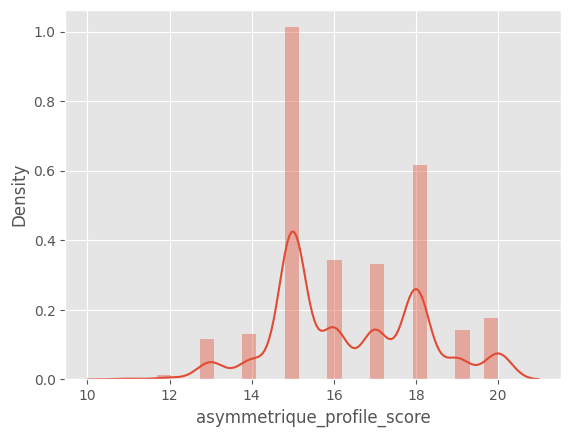

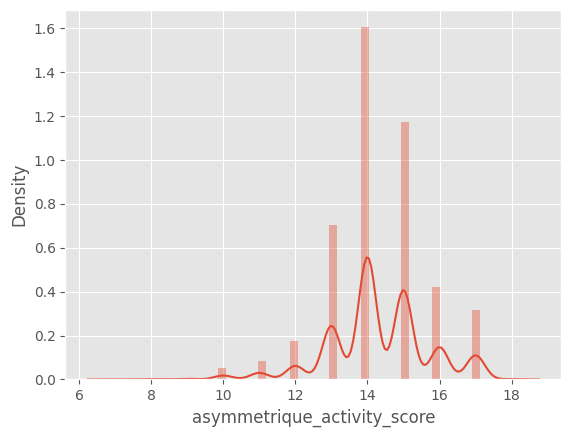

Both scores roughly follow standard distribution, therefore imputation can be done by median value.
Though instead of using scores, we shall use the categorical index columns derived from these scores.
Missing values will be filled by most frequently occuring category.


In [13]:
# Asymmetrique scores
for col in ['profile_score', 'activity_score']:
    sns.distplot(lead_df['asymmetrique_'+col].dropna())
    plt.show()
    
print(f"Both scores roughly follow standard distribution, therefore imputation can be done by median value.\nThough instead of using scores, we shall use the categorical index columns derived from these scores.\nMissing values will be filled by most frequently occuring category.")

# Dropping Scores (Only Indexes will be used)
lead_df.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score'], axis=1, inplace=True)

# Removing initial numbers from category naming
lead_df['asymmetrique_profile_index'] = lead_df['asymmetrique_profile_index'].str[3:]
lead_df['asymmetrique_activity_index'] = lead_df['asymmetrique_activity_index'].str[3:]

# Replacing nan with most commonly occuring category
lead_df['asymmetrique_activity_index'].fillna(lead_df['asymmetrique_activity_index'].mode().values[0], inplace=True)
lead_df['asymmetrique_profile_index'].fillna(lead_df['asymmetrique_profile_index'].mode().values[0], inplace=True)

In [14]:
# Imputing for 'Country' and 'City'
print("\nWe'll first try understanding how cities are labelled for different country categories\n")

for country in lead_df.country.dropna().unique():
    print(country.upper())
    print(lead_df[lead_df.country == country]['city'].value_counts())
    print()
    
print("It looks like customers outside India are wrongly marked as being from domestic cities.\n")

print("\nLets look at how countries are labeled w.r.t city categories\n")
for city in lead_df.city.dropna().unique():
    print(city.upper())
    print(lead_df[lead_df.city == city]['country'].value_counts())
    print()
    
# We will make a new city label ('international') for countries labeled as 'others'
lead_df.city[lead_df.country == "others"] = lead_df.city[lead_df.country == "others"].replace(lead_df.city[lead_df.country == "others"].unique(), 'international')

# We'll also assume that rows with a domestic city label will have to have country label as 'india'.
lead_df.country[(lead_df.city != "international") & ~lead_df.city.isna()] = 'india'

# We'll assume that rows with a country label 'india 'will have most frequently occuring city label.
lead_df.city[(lead_df.country == "india") & (lead_df.city.isna())] = 'mumbai'


We'll first try understanding how cities are labelled for different country categories

INDIA
city
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: count, dtype: int64

OTHERS
city
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: count, dtype: int64

It looks like customers outside India are wrongly marked as being from domestic cities.


Lets look at how countries are labeled w.r.t city categories

MUMBAI
country
india     2918
others      93
Name: count, dtype: int64

THANE_&_OUTSKIRTS
country
india     651
others     21
Name: count, dtype: int64

OTHER_METRO_CITIES
country
india     345
others     20
Name: count, dtype: int64

OTHER_CITIES
country
india 

In [15]:
print(f"There are {len(lead_df[(lead_df.city.isna()) & (lead_df.country.isna())])} entries where both country and city are NA")
print("We'll mark these as 'unknown'")
lead_df[['city', 'country']] = lead_df[['city', 'country']].fillna('unknown', axis=1)

There are 2055 entries where both country and city are NA
We'll mark these as 'unknown'


In [16]:
# Few columns have less than 2% na values. We can afford to drop their respective rows altogehter. 
lead_df.dropna(subset=['totalvisits', 'page_views_per', 'lead_source'], inplace=True)

# There are too many NA values with no logical way to impute in these columns so we will drop them entirely
lead_df.drop(['specialization', 'tags', 'what_matters_most', 'what_is_your'] , axis=1, inplace=True)

In [17]:
round(lead_df.isna().sum().sort_values(ascending=False), 2)

lead_origin                    0
lead_source                    0
a_free_copy                    0
asymmetrique_profile_index     0
asymmetrique_activity_index    0
city                           0
lead_quality                   0
through_recommendations        0
digital_advertisement          0
newspaper                      0
x_education_forums             0
newspaper_article              0
magazine                       0
search                         0
country                        0
page_views_per                 0
total_time_spent               0
totalvisits                    0
converted                      0
do_not_call                    0
do_not_email                   0
last_notable_activity          0
dtype: int64

In [18]:
lead_df.isnull().sum()

lead_origin                    0
lead_source                    0
do_not_email                   0
do_not_call                    0
converted                      0
totalvisits                    0
total_time_spent               0
page_views_per                 0
country                        0
search                         0
magazine                       0
newspaper_article              0
x_education_forums             0
newspaper                      0
digital_advertisement          0
through_recommendations        0
lead_quality                   0
city                           0
asymmetrique_activity_index    0
asymmetrique_profile_index     0
a_free_copy                    0
last_notable_activity          0
dtype: int64

In [19]:
# Missing Data Percentage

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

lead_origin                    0.0
lead_source                    0.0
do_not_email                   0.0
do_not_call                    0.0
converted                      0.0
totalvisits                    0.0
total_time_spent               0.0
page_views_per                 0.0
country                        0.0
search                         0.0
magazine                       0.0
newspaper_article              0.0
x_education_forums             0.0
newspaper                      0.0
digital_advertisement          0.0
through_recommendations        0.0
lead_quality                   0.0
city                           0.0
asymmetrique_activity_index    0.0
asymmetrique_profile_index     0.0
a_free_copy                    0.0
last_notable_activity          0.0
dtype: float64

In [20]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(lead_df.select_dtypes(include=['object']), drop_first=True)

# getting the cleaned df
clean_df = lead_df.drop(lead_df.select_dtypes(include=['object']).columns, axis=1)
clean_df = pd.concat([clean_df, dummies], axis=1)

clean_df.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,city_mumbai,city_other_cities,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [21]:
# After Cleaning shape of data
clean_df.shape

(9074, 56)

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   converted                                           9074 non-null   int64  
 1   totalvisits                                         9074 non-null   float64
 2   total_time_spent                                    9074 non-null   int64  
 3   page_views_per                                      9074 non-null   float64
 4   lead_origin_landing_page_submission                 9074 non-null   bool   
 5   lead_origin_lead_add_form                           9074 non-null   bool   
 6   lead_origin_lead_import                             9074 non-null   bool   
 7   lead_source_facebook                                9074 non-null   bool   
 8   lead_source_google                                  9074 non-null   bool   
 9   le

In [23]:
# After data cleaning obtained columns
clean_df.columns

Index(['converted', 'totalvisits', 'total_time_spent', 'page_views_per',
       'lead_origin_landing_page_submission', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'lead_source_facebook', 'lead_source_google',
       'lead_source_olark_chat', 'lead_source_organic_search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral_sites', 'lead_source_welingak_website',
       'do_not_email_yes', 'do_not_call_yes', 'country_others',
       'country_unknown', 'search_yes', 'newspaper_article_yes',
       'x_education_forums_yes', 'newspaper_yes', 'digital_advertisement_yes',
       'through_recommendations_yes', 'lead_quality_low_in_relevance',
       'lead_quality_might_be', 'lead_quality_not_sure', 'lead_quality_worst',
       'city_mumbai', 'city_other_cities', 'city_other_cities_of_maharashtra',
       'city_other_metro_cities', 'city_thane_&_outskirts',
       'city_tier_ii_cities', 'city_unknown',
       'asymmetrique_activity_index_low', '

In [24]:
clean_df.describe(include = 'all')

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,city_mumbai,city_other_cities,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,4885,8493,9044,9043,6201,7321,7920,9051,8631,8949,8945,8358,9072,8787,7113,9060,9072,9073,9073,9070,9067,8518,7555,5806,8473,4638,8461,8651,8717,8350,9003,7113,8712,7892,9043,6889,6186,9014,8901,9072,6251,9073,9073,9060,5807,8891,8756,9073,6922,9042,9029,9073
mean,0.378554,3.456028,482.887481,2.370151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.485053,4.858802,545.256560,2.160871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,246.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,5.000000,922.750000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [25]:
print(f"{round(len(clean_df)/9239*100,2)}% data has been retained after data cleaning.")

98.21% data has been retained after data cleaning.


# Correlations

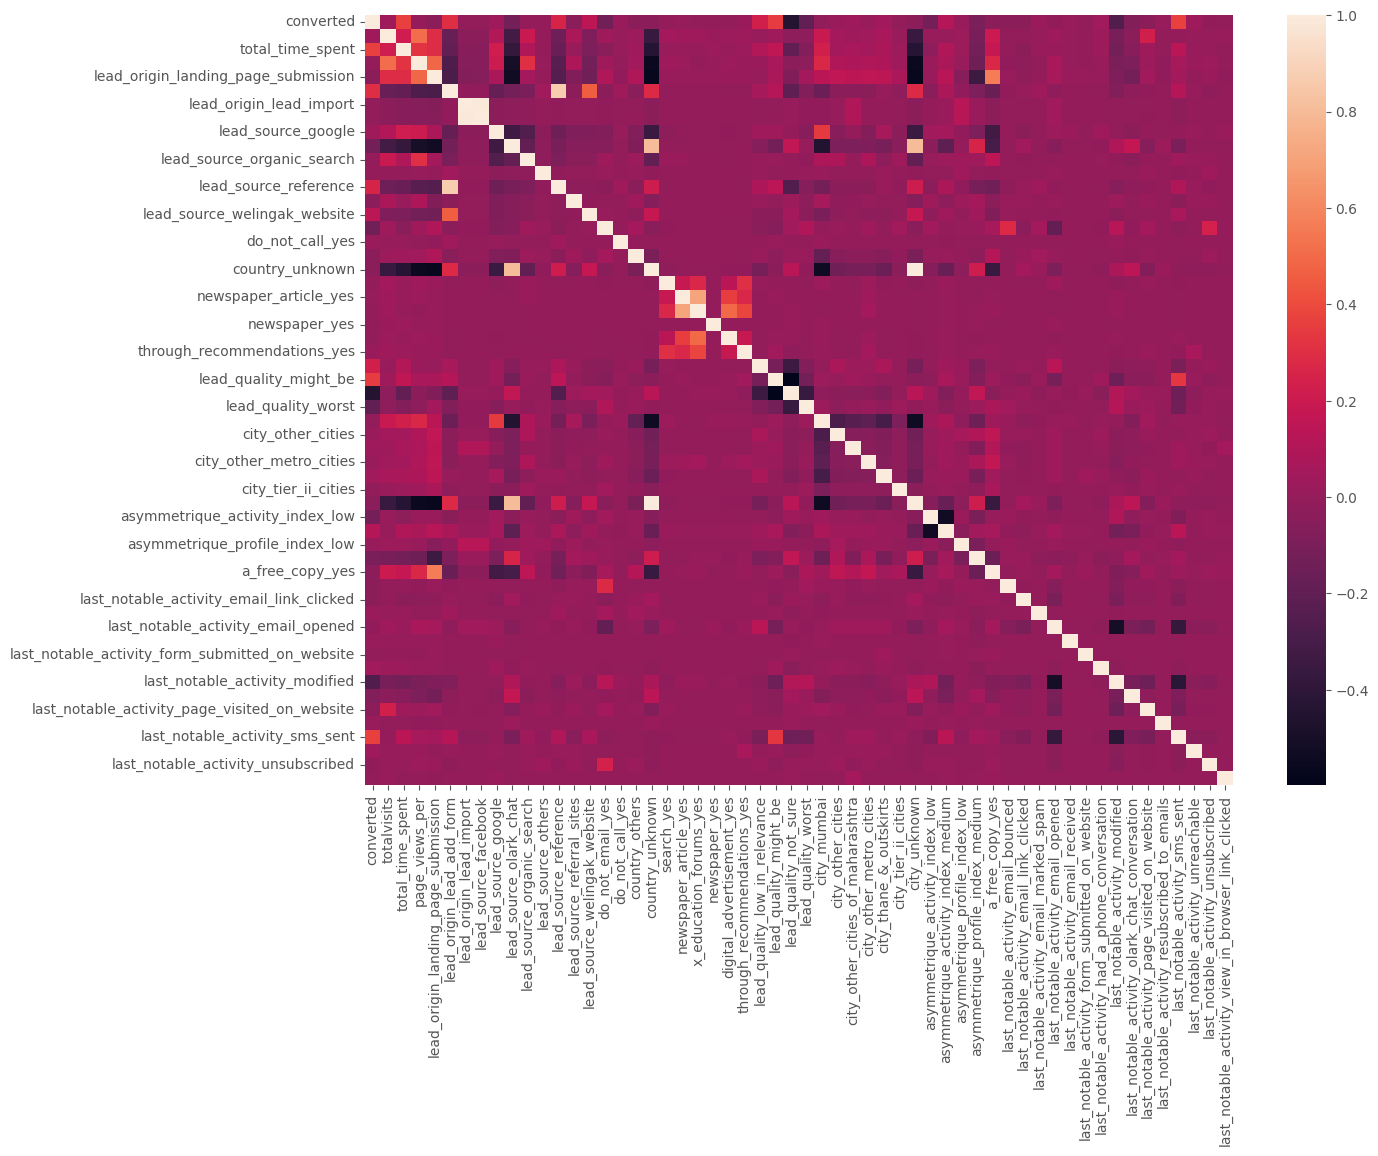

In [26]:
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(clean_df.corr())
plt.show()

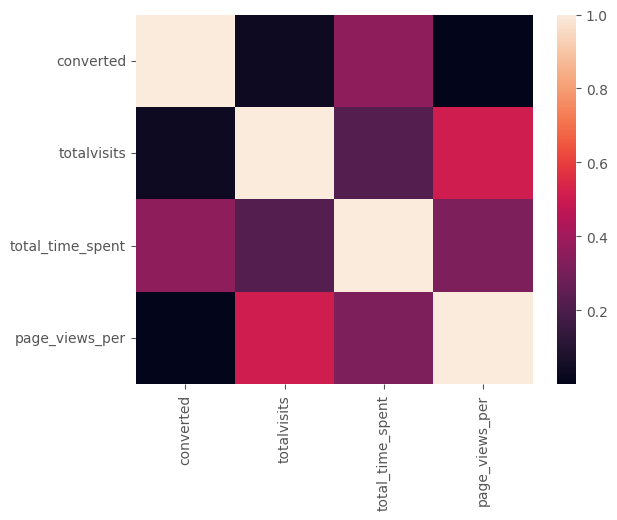

In [27]:
# heatmap of only continuous variables
sns.heatmap(clean_df[clean_df.columns[:4]].corr())
plt.show()

In [28]:
# columns pairs in order of highest absolute correlation
clean_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)


converted                            converted                              1.000000
lead_source_facebook                 lead_origin_lead_import                0.983684
lead_source_reference                lead_origin_lead_add_form              0.866191
lead_source_olark_chat               city_unknown                           0.803772
newspaper_article_yes                x_education_forums_yes                 0.707068
lead_quality_might_be                lead_quality_not_sure                  0.597667
country_unknown                      lead_origin_landing_page_submission    0.566471
lead_origin_landing_page_submission  a_free_copy_yes                        0.564863
page_views_per                       country_unknown                        0.556781
city_mumbai                          country_unknown                        0.536886
lead_origin_landing_page_submission  lead_source_olark_chat                 0.528424
asymmetrique_activity_index_low      asymmetrique_activity_index_

In [29]:
# Dropping variables with high multi-collinearity
clean_df.drop(['lead_source_facebook', 'lead_origin_lead_add_form', 'lead_source_olark_chat'], axis=1, inplace=True)

In [30]:
# Top 5 features correlated with target variable
clean_df.corr()['converted'].abs().sort_values(ascending=False).head(6)[1:]

lead_quality_not_sure             0.443920
last_notable_activity_sms_sent    0.360233
total_time_spent                  0.359261
lead_quality_might_be             0.349936
last_notable_activity_modified    0.263532
Name: converted, dtype: float64

# Univariate and Outlier Analysis

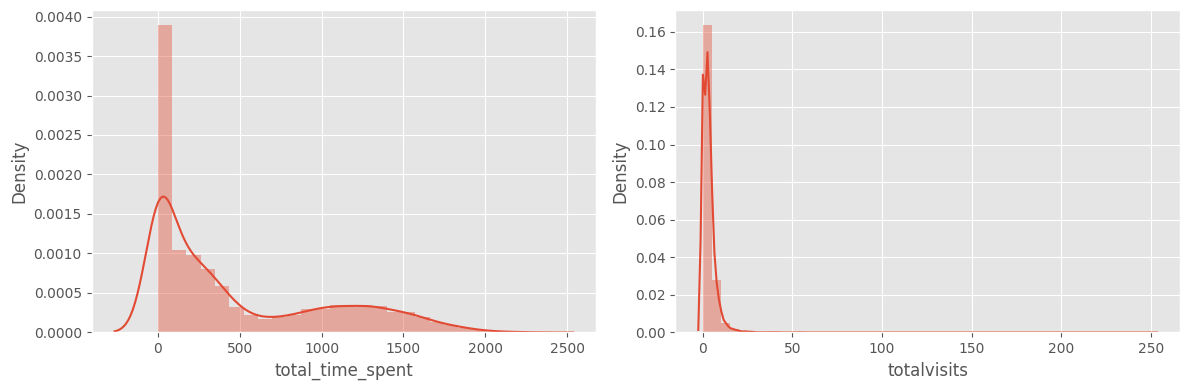

In [31]:
def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(clean_df['total_time_spent'])

    plt.subplot(122)
    sns.distplot(clean_df['totalvisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

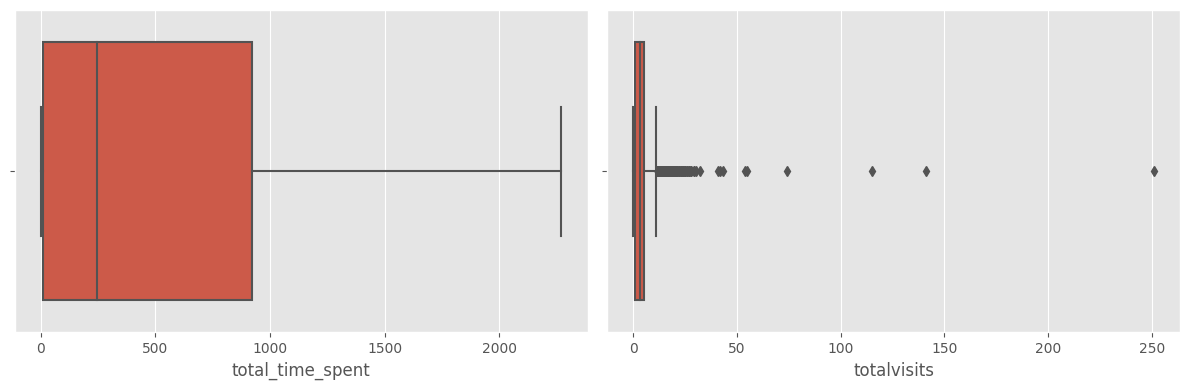

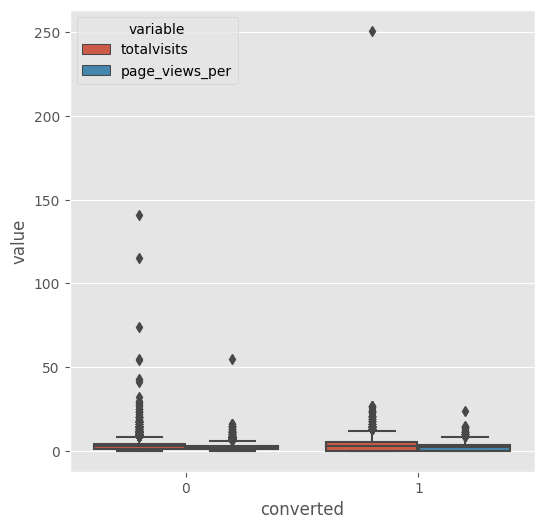

In [32]:
# Boxplots before outlier removal
num_df = clean_df[['converted', 'totalvisits',  'page_views_per', 'total_time_spent']]

def plot_boxes():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.boxplot(data=clean_df, x='total_time_spent')

    plt.subplot(122)
    sns.boxplot(data=clean_df, x='totalvisits')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    box_long = pd.melt(num_df.drop('total_time_spent', axis=1), id_vars='converted')
    sns.boxplot(x='converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()


In [33]:
# Removing outliers
out_df = num_df.drop('converted', axis=1)
q = out_df.quantile(0.97)
out_df = out_df[out_df < q]
out_df = out_df.dropna()

clean_df = clean_df.loc[out_df.index].reset_index(drop=True)
num_df = num_df.loc[out_df.index].reset_index(drop=True)

In [34]:
print(f"{round(len(clean_df)/9239*100,2)}% data has been retained after outlier removal.")

88.78% data has been retained after outlier removal.


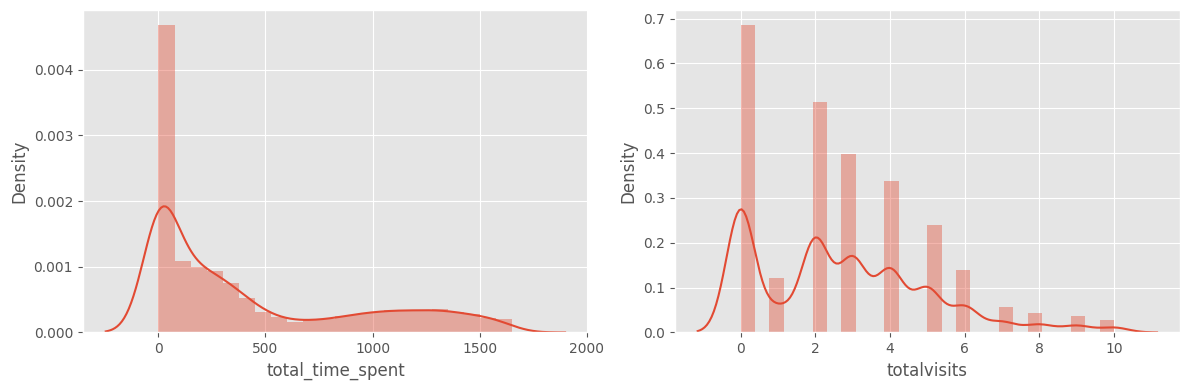

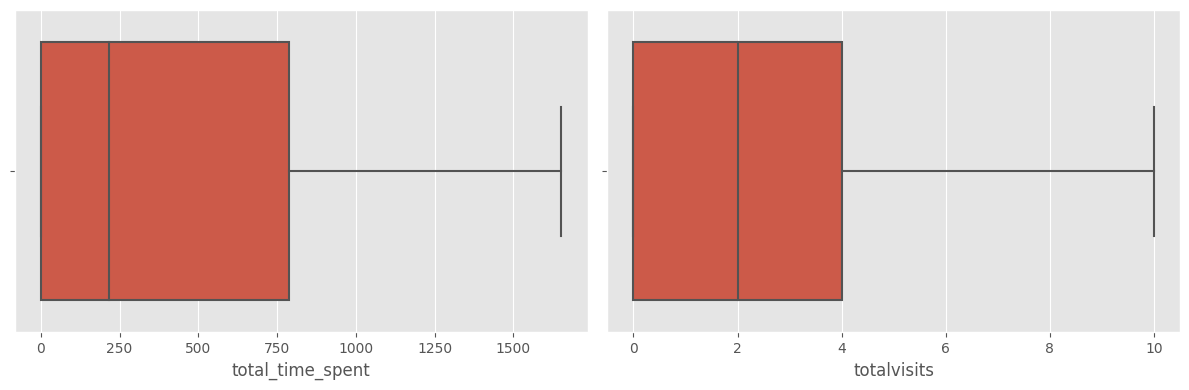

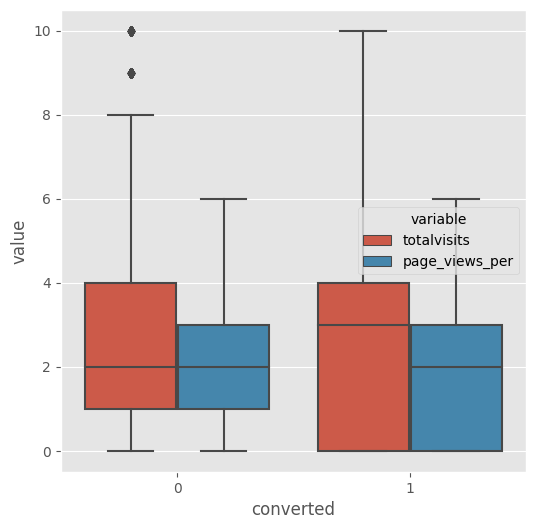

In [35]:
# After Outlier removal
plot_bars()
plot_boxes()

# Bivariate Analysis

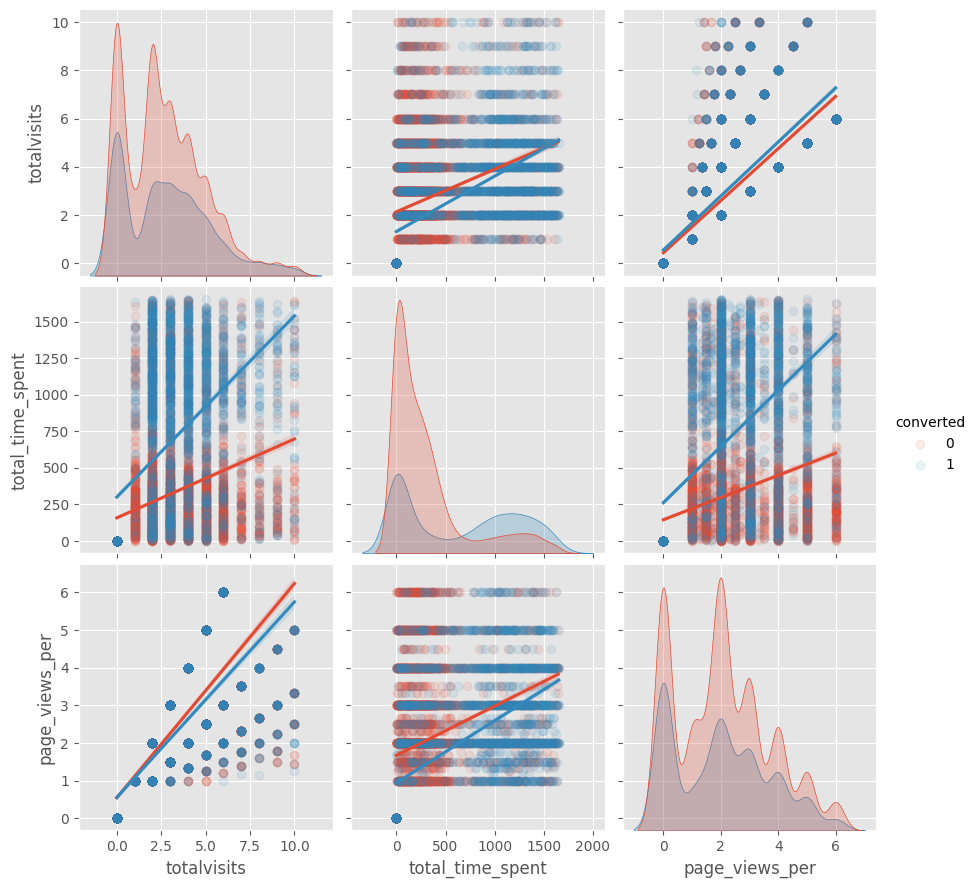

In [36]:
sns.pairplot(data=clean_df, vars=clean_df.columns[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()


# Building the Predictive Model